# GPGN409 homework 
your name: Benjamin Nguyen

In [2]:
using DataFrames, CSV
using LinearAlgebra
using Plots, Printf

## Gaussian function
In mathematics, a Gaussian function [Wikikipedia], often simply referred to as a Gaussian, is a function of the base form

$$f(x) = \exp(-x^2)$$

and with parametric extension

$$f(x) = a \exp\left( -\frac{(x - b)^2}{2c^2} \right)$$

for arbitrary real constants $a$, $b$, and non-zero $c$. It is named after the mathematician Carl Friedrich Gauss. The graph of a Gaussian is a characteristic symmetric "bell curve" shape. The parameter $a$ is the height of the curve's peak, $b$ is the position of the center of the peak, and $c$ (the standard deviation, sometimes called the Gaussian RMS width) controls the width of the "bell".

Now, we need to find: $a$, $b$, and non-zero $c$

## Linearization

The Gaussian function is given by:

$$
f(x) = a \exp \left( -\frac{(x - b)^2}{2c^2} \right)
$$


$$
\therefore f(x) = a \exp \left( -\frac{x^2 - 2bx + b^2}{2c^2} \right)
$$

This simplifies to:

$$
f(x) = a \exp \left( -\frac{x^2}{2c^2} + \frac{bx}{c^2} - \frac{b^2}{2c^2} \right)
$$

Taking the natural logarithm of both sides for linearization:

$$
\ln(f(x)) = \ln(a) - \frac{x^2}{2c^2} + \frac{bx}{c^2} - \frac{b^2}{2c^2}
$$
    
Or
$$
\ln(f(x)) = \ln(a) - \frac{b^2}{2c^2} + \frac{bx}{c^2} - \frac{x^2}{2c^2}
$$

Let $ m = \ln(a) - \frac{b^2}{2c^2} $, $ n = \frac{b}{c^2} $, and $ p = -\frac{1}{2c^2} $.

The equation becomes:

$$
\ln(f(x)) = m + n x + p x^2
$$



## Forward Problem

This can be rewritten in matrix form as:

$$
d = 
\begin{bmatrix} 
1 & x & x^2 
\end{bmatrix}
\begin{bmatrix} 
m \\ 
n \\ 
p 
\end{bmatrix}
$$

Model parameter

- $m = \ln(a) - \frac{b^2}{2c^2}$
- $n = \frac{b}{c^2}$
- $p = -\frac{1}{2c^2}$

Data (with $d = P$)
- $d = \ln(f(x))$

Operator (with $x = t$)
- $\begin{bmatrix} 
1 & x & x^2 
\end{bmatrix}$



## Least Squares

In the standard least squares method, we aim to minimize the residuals between the observed data and the predicted data. The residuals are defined as:

$$
\mathbf{r} = \|\mathbf{d} - G \cdot \mathbf{m}\|
$$

where:
- $\mathbf{d}$ is the vector of observed data.
- $G$ is the matrix operator (forward operator).
- $\mathbf{m}$ is the vector of model parameters.



The solution:

$$
\mathbf{m} = (G^T  G)^{-1} G^T  \mathbf{d}
$$


## Calculate the model parameters

In [3]:
# Load the data from the text file
df = CSV.read("HW4data.csv", DataFrame; delim=',', ignorerepeated=true)

# Sort the DataFrame by the 'Year' column
sort!(df, :Year)


# Plot data
t = df.Year # Time axis
P = df.KBPY # Number of berrels per year



# Calculate model parameters m, n, p
N = length(t) # Length of the data
G = hcat(ones(length(t)), t, t.^2) # Create the forward operator
d = log.(P) # Natural Logarithm because of the linearization
M = (G'G)^-1*G'd # P = d
print("Model parameters: ")
@show m, n, p = M; # Display the parameters

Model parameters: (m, n, p) = M = [-2313.0313608795404, 2.355987566319527, -0.0005960822010386835]


In [4]:
df

Row,Year,KBPY
,Int64,Int64
1,1859,2
2,1860,500
3,1861,2114
4,1862,3057
5,1863,2611
6,1864,2116
7,1865,2498
8,1866,3598
9,1867,3347


In [5]:
# Calculate parameters: a, b, c
c_squared = -1 / (2 * p)
c = √(c_squared)
# Calculate b from n
b = n * c_squared
# Calculate a from m
a = exp(m + (b^2) / (2 * c_squared));

@show a, b, c;

(a, b, c) = (3.1153270609566644e6, 1976.2270725532303, 28.96222513452848)


The optimal Gaussian that ﬁts the observation:
$$f(x) = a \exp\left( -\frac{(x - b)^2}{2c^2} \right)$$

with above $a=3.1153269051012946e6$, $b=1976.227072527962$, $c=28.9622251347011$

## Plot and compare the inversion data with the real data

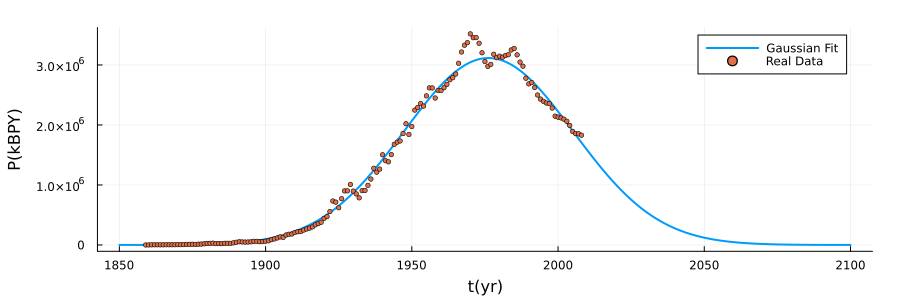

In [6]:
t0 = 1850
t1 = 2100
time = t0:t1
nbarrels = a .* exp.(-((time .- b).^2) ./ (2 * c^2))
plot(time, nbarrels, linewidth=2, label="Gaussian Fit")
scatter!(t, P, size=(900, 300), markersize=2.5, label="Real Data")
# xlims!(1850, 2100)
xlabel!("t(yr)")
ylabel!("P(kBPY)")
plot!(legend=:topright, margin=5Plots.mm)

##  Cummulative oil production until year 2100
The cummulative oil production from year $t_0$ to year $t$:

$$C(t) = \int_{t_0}^{t} a \cdot \exp\left( -\frac{(t' - b)^2}{2c^2} \right) \, dt'$$

Lets use the trapezoidal rule

The formula for the trapezoidal rule is:

$$
\int_{a}^{b} f(x) \, dx \approx \frac{\Delta x}{2} \left( f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)
$$

Where, $a$ and $b$ are the bounds of the integral, $x_0, x_1, \dots, x_n$ are the points where the function is evaluated, $\Delta x = \frac{b - a}{n}$ is the width of each subinterval.

In [7]:
# Trapezoidal rule for numerical integration
function gaussian(t, a, b, c)
    return a * exp.(-((t .- b).^2) ./ (2 * c^2))
end

function trapezoidal_rule(f, t0, t1, a, b, c, n)
    h = (t1 - t0) / n
    t_values = range(t0, stop=t1, length=n+1)
    f_values = f(t_values, a, b, c)
    
    integral = h * (0.5 * f_values[1] + sum(f_values[2:end-1]) + 0.5 * f_values[end])
    return integral
end
n = 1000
# Compute the cumulative oil production using the trapezoidal rule
cumulative_oil = trapezoidal_rule(gaussian, t0, t1, a, b, c, n)

# Display the result
@printf("Cumulative oil production from 1850 to 2100: %.2e barrels\n", cumulative_oil)


Cumulative oil production from 1850 to 2100: 2.26e+08 barrels


In [8]:
# 1 ton of CO2 is equivalent with 3.15 barrels of oil.
co2 = @printf("Cumulative emitted CO2 from 1850 to 2100: %.2e ton\n", cumulative_oil/3.15)

Cumulative emitted CO2 from 1850 to 2100: 7.18e+07 ton


The equation for the logistic curve is given by:

$$
Q = \frac{L}{1 + e^{-k(t - t_0)}}
$$

Take the reciprocal of both sides:
$$
\frac{1}{Q} = \frac{1 + e^{-k(t - t_0)}}{L}
$$




In [10]:
t0 = 1975

1975

In [25]:
Q = cumsum(Float64(P))

MethodError: MethodError: no method matching Float64(::Vector{Int64})

Closest candidates are:
  Float64(!Matched::IrrationalConstants.Sqrthalfπ)
   @ IrrationalConstants ~/.julia/packages/IrrationalConstants/vp5v4/src/macro.jl:112
  Float64(!Matched::UInt8)
   @ Base float.jl:165
  Float64(!Matched::UInt128)
   @ Base float.jl:180
  ...


In [18]:
G = [Q.^3 Q.^2]

150×2 Matrix{Int64}:
                    8                  4
            126506008             252004
          17902480896            6843456
         182573756217           32182929
         568486650304           68624656
        1124864000000          108160000
        2145690694792          166358404
        4488858791936          272118016
        7813075070107          393744649
       12959659279169          551733121
                    ⋮  
  7628372222636699816  33172436245788324
  7070609213870177761  33948257436779841
 -1945802324048077643  34725248014211689
  1665136146043237888  35497993484628544
  8257192266740424488  36252352685056036
  -833929375273229399  36976444399345201
  2788817195894150485  37693811291421481
 -5883826696841212853  38416358680837225
  4147007307096339123  39137023450332025

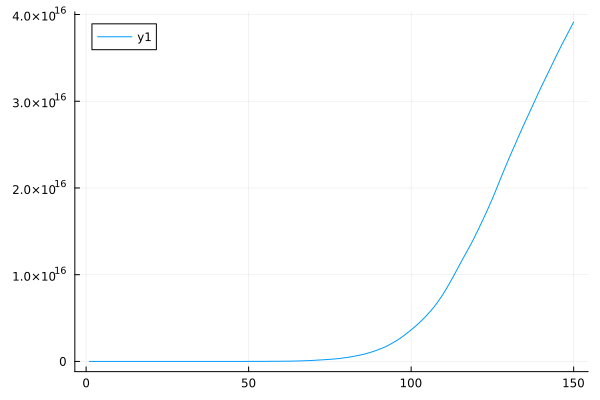

In [24]:
plot(cumsum(P).^2 )

In [46]:
gradient = diff(1 ./ Q_vec) ./ diff(1:length(1 ./Q_vec))
pushfirst!(gradient, gradient[1])

150-element Vector{Float64}:
 -0.49604743083003955
 -0.49604743083003955
 -0.003311543528934833
 -0.0003998002158658292
 -9.794868613839197e-5
 -3.6244736452651806e-5
 -2.119509269752342e-5
 -1.7800442324639656e-5
 -1.3002208720485728e-5
 -8.881122720520884e-6
  ⋮
 -6.60134336958058e-11
 -6.40368450834609e-11
 -6.207205245187646e-11
 -5.988579899560607e-11
 -5.710556308342543e-11
 -5.35772518349274e-11
 -5.069271236753343e-11
 -4.9191632393170344e-11
 -4.792415036938707e-11

In [47]:
d

150-element Vector{Float64}:
  0.6931471805599453
  6.214608098422191
  7.656337166430183
  8.025189321890835
  7.8674885686991285
  7.65728279297819
  7.823245690685523
  8.188133414510478
  8.115819701211327
  8.201385955238608
  ⋮
 14.57196440749336
 14.565751900300048
 14.555821819431811
 14.53918451872584
 14.504345453975873
 14.4531952387499
 14.43411736520628
 14.431762655212825
 14.419760948897059

In [48]:
d

150-element Vector{Float64}:
  0.6931471805599453
  6.214608098422191
  7.656337166430183
  8.025189321890835
  7.8674885686991285
  7.65728279297819
  7.823245690685523
  8.188133414510478
  8.115819701211327
  8.201385955238608
  ⋮
 14.57196440749336
 14.565751900300048
 14.555821819431811
 14.53918451872584
 14.504345453975873
 14.4531952387499
 14.43411736520628
 14.431762655212825
 14.419760948897059

In [49]:
d = log.(1. ./Q.^2 .* P)
# d = log.(-gradient)
G = [ones(length(t)) (t .- t0)]
M = (G'G)^-1*G'd # P = d
@show M;

M = [-22.21005020095977; -0.09097175044215204;;]


150×1 Matrix{Float64}:
     2.0
   253.0
  1560.0
  4145.5
  6979.5
  9343.0
 11650.0
 14698.0
 18170.5
 21667.0
     ⋮
     1.810676655e8
     1.831917745e8
     1.85298824e8
     1.873781155e8
     1.8940481e8
     1.913465545e8
     1.93220772e8
     1.95074929e8
     1.96915856e8

In [30]:
tt = 0:2100
GG = [ones(length(tt)) (tt .- t0)]
dd = GG * M

2101×1 Matrix{Float64}:
 157.4591569222905
 157.36818517184835
 157.2772134214062
 157.18624167096405
 157.0952699205219
 157.00429817007975
 156.9133264196376
 156.82235466919545
 156.7313829187533
 156.64041116831115
   ⋮
 -32.85374500269156
 -32.94471675313371
 -33.03568850357586
 -33.12666025401801
 -33.21763200446017
 -33.30860375490232
 -33.39957550534447
 -33.49054725578662
 -33.581519006228774

In [34]:
QQ = sqrt(P / dd)

DimensionMismatch: DimensionMismatch: matrix is not square: dimensions are (150, 2101)

In [14]:
d = log.(1. ./Q.^2 .* P)
# d = log.(-gradient)
G = [ones(length(t)) (t)]
M = (G'G)^-1*G'd # P = d
@show M;

M = [157.45915692230682; -0.09097175044216013;;]


In [80]:
k = -M[2]
# k = 0.06134033932053486

0.09097175044216013

In [86]:
L = exp(k*1975 + log(k)- M[1]) 


4.0235443836397713e8

In [66]:
L = exp(log(k)-M[1])
# L = 2

4.125041157668642e8

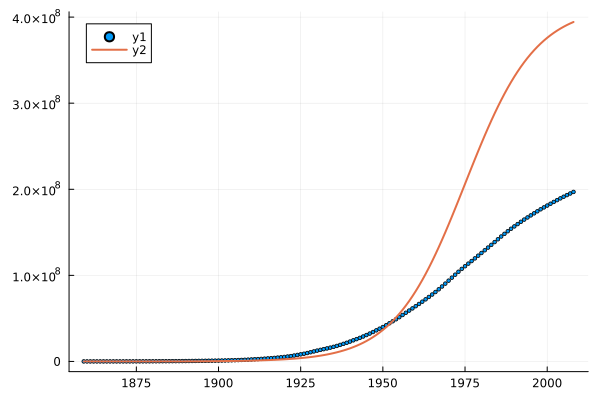

In [67]:
# Define the function with L, k, and fixed t0 = 1975
function create_matrix(L, k, t; t0=1975)
    # Compute the matrix [1, t - t0]
    matrix = [ones(length(t)) (t .- t0)]
    
    # Return the logistic model result using L, k, and fixed t0
    logistic_values = L ./ (1 .+ exp.(-k .* (t .- t0)))
    
    return matrix, logistic_values
end

# Call the function
matrix, logistic_values = create_matrix(L, k, t)


scatter(t, Q, markersize=2)
plot!(t, logistic_values, linewidth=2)

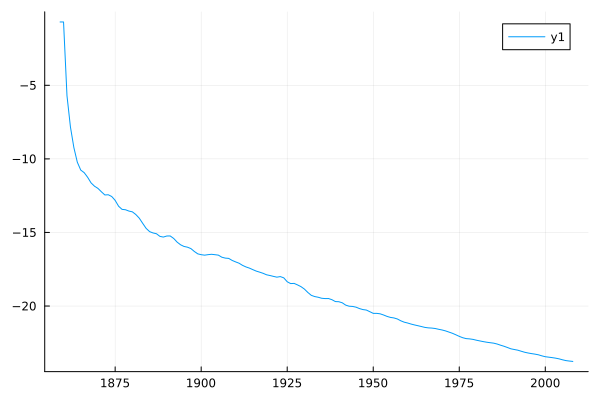

In [68]:
plot(t,d)

In [69]:
using LsqFit

In [70]:
a = -1.0./Q.^2

150×1 Matrix{Float64}:
 -0.25
 -1.5622803043322032e-5
 -4.10913872452334e-7
 -5.818970574353198e-8
 -2.052822394461206e-8
 -1.1455849573880773e-8
 -7.3679750962441746e-9
 -4.628960916220233e-9
 -3.0287696445402857e-9
 -2.130111972381888e-9
  ⋮
 -3.050128915426793e-17
 -2.979806485154334e-17
 -2.91242448703745e-17
 -2.848146119482571e-17
 -2.787520001360786e-17
 -2.7312327228000686e-17
 -2.678504461252714e-17
 -2.6278289024489476e-17
 -2.578924479968935e-17

Optimal L: 2.2039135789180192e8
Optimal k: 0.06134033932053486
Fixed t0: 1975


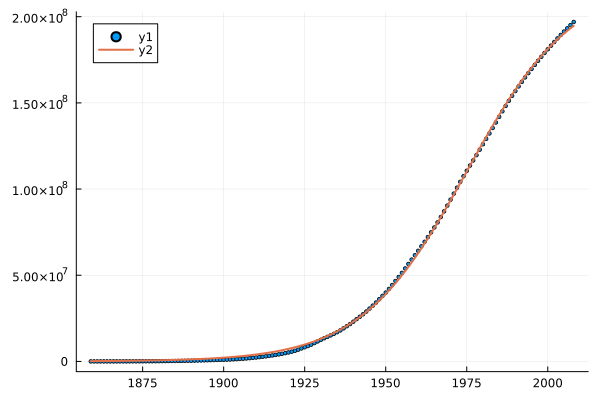

In [71]:
using Optim

# Define the logistic function
function logistic_model(t, L, k, t0)
    return L ./ (1 .+ exp.(-k .* (t .- t0)))
end

# Loss function: Sum of squared residuals (SSR) between the model and observed Q values
function loss(params, t, Q, t0)
    L, k = params  # Only optimize L and k
    Q_pred = logistic_model(t, L, k, t0)
    return sum((Q_pred .- Q).^2)
end

# Example data: array of t (independent variable) and Q (dependent variable)
# t = [1.0, 2.0, 3.0, 4.0, 5.0]  # Replace with your actual t values
# Q = [1.5, 2.5, 3.0, 3.8, 4.0]  # Replace with your actual Q array

# Fix t0
t0 = 1975  # You already know this

# Initial guess for L and k
initial_guess = [2.8e8, 0.1]  # Broad guesses for L and k

# Perform the optimization, keeping t0 constant
result = optimize(p -> loss(p, t, Q, t0), initial_guess, NelderMead())
# Extract optimized parameters
optimal_params = result.minimizer
L, k = optimal_params

println("Optimal L: ", L)
println("Optimal k: ", k)
println("Fixed t0: ", t0)


# Define the function with L, k, and fixed t0 = 1975
function create_matrix(L, k, t; t0=1975)
    # Compute the matrix [1, t - t0]
    matrix = [ones(length(t)) (t .- t0)]
    
    # Return the logistic model result using L, k, and fixed t0
    logistic_values = L ./ (1 .+ exp.(-k .* (t .- t0)))
    
    return matrix, logistic_values
end

# Call the function
matrix, logistic_values = create_matrix(L, k, t)


scatter(t, Q, markersize=2)
plot!(t, logistic_values, linewidth=2)

In [72]:
using Optim

# Define the data
# t = 1859:2008
# t0 = 1975
# # d = 11  # This should be the observed data for d

# Define the objective function to minimize
function objective(x)
    k = x[1]  # First element is k
    L = x[2]  # Second element is L
    predicted_d = log(k) .- log(L) .- k .* (t .- t0)
    return sum((predicted_d .- d).^2)  # Minimize the difference between predicted and observed d
end

# Initial guess for k and L
initial_guess = [1.0, 1.0]

# Solve using Optim
result = optimize(objective, initial_guess, BFGS())

# Extract the optimal values for k and L
optimal_k = result.minimizer[1]
optimal_L = result.minimizer[2]

println("Optimal k: ", optimal_k)
println("Optimal L: ", optimal_L)


DomainError: DomainError with -1.2729852224165886e6:
log was called with a negative real argument but will only return a complex result if called with a complex argument. Try log(Complex(x)).

In [73]:
x = -1_000_000

-1000000

In [74]:
log(complex(x))

13.815510557964274 + 3.141592653589793im